# **AIN 214 - PA3 - FALL 2024**




**Student Number** : 2220765032

**Name Surname**   : Yiğit Kaya Bağcı


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [97]:
# Check for missing values
data_path = "Data/insurance.csv"
df = pd.read_csv(data_path)
missing_values = df.isna().sum()
print("Missing Values:")
print()
missing_values

Missing Values:



,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


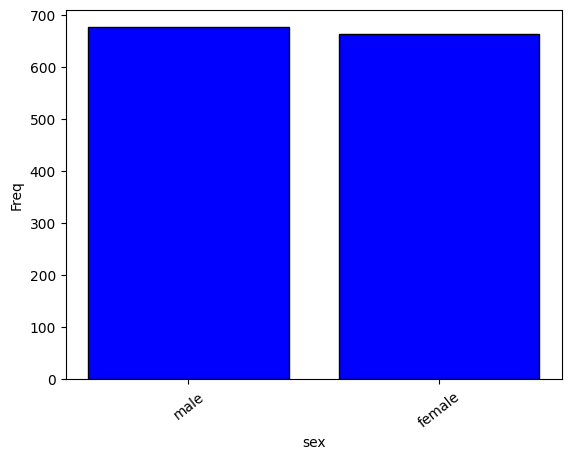

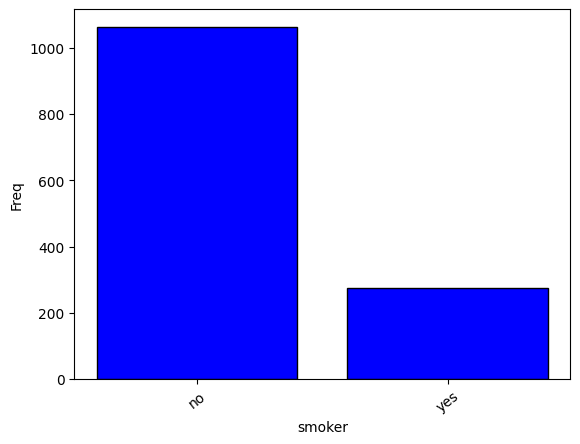

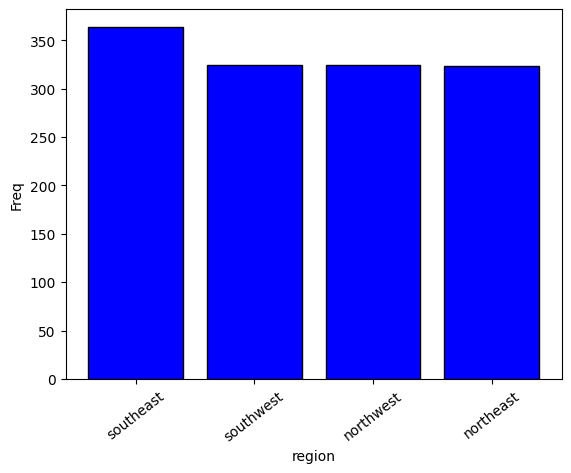

In [161]:
# To show catogorical column's disturbution bar chart is better.

categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns:
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Freq')
    plt.xticks(rotation=38)
    plt.show()



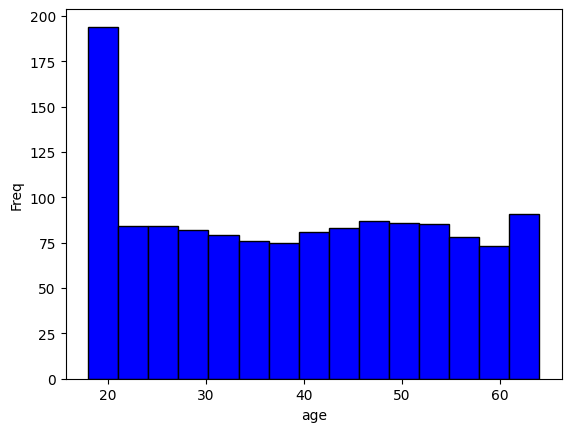

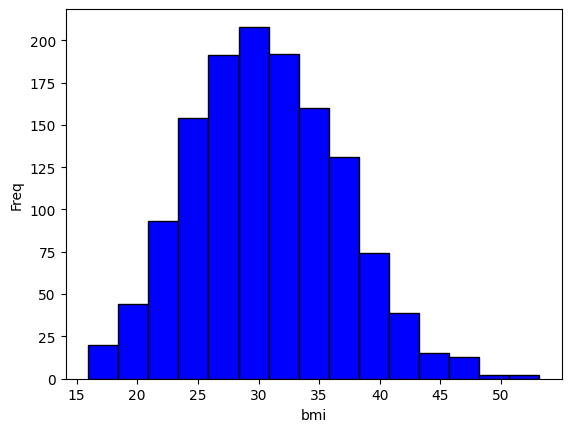

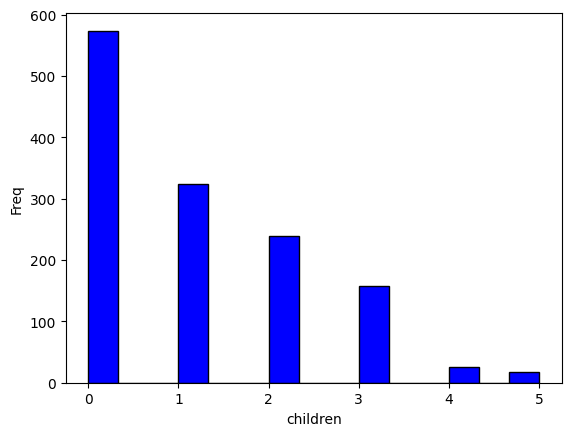

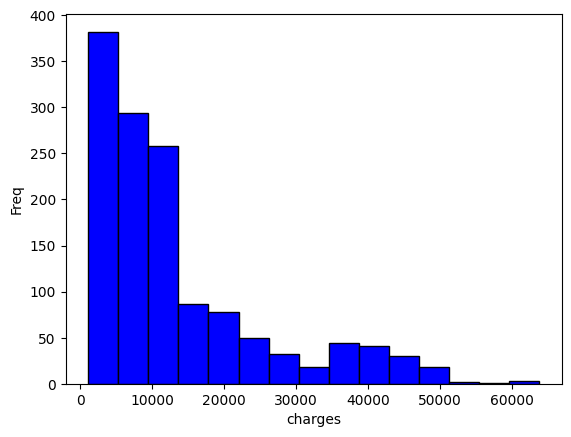

In [99]:
# For numeric column's distrubution histogram is better

numeric_columns = ['age', 'bmi', 'children', 'charges']

for col in numeric_columns:
    plt.hist(df[col], bins=15, color='blue', edgecolor='black')
    plt.ylabel('Freq')
    plt.xlabel(col)
    plt.show()

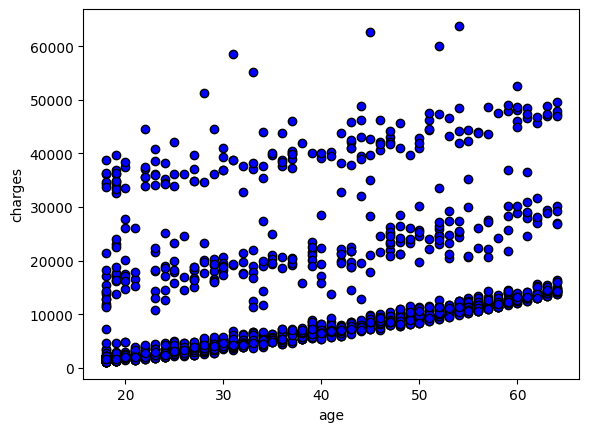

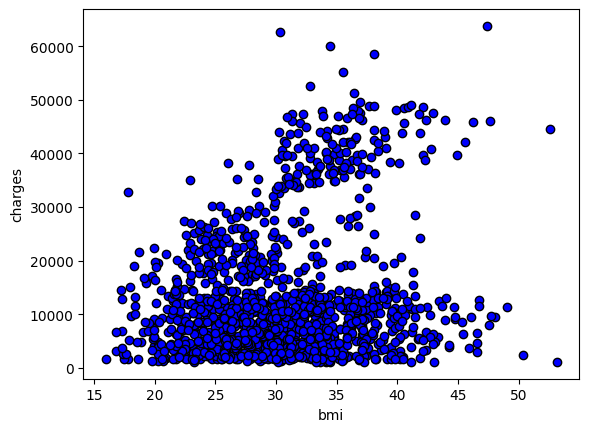

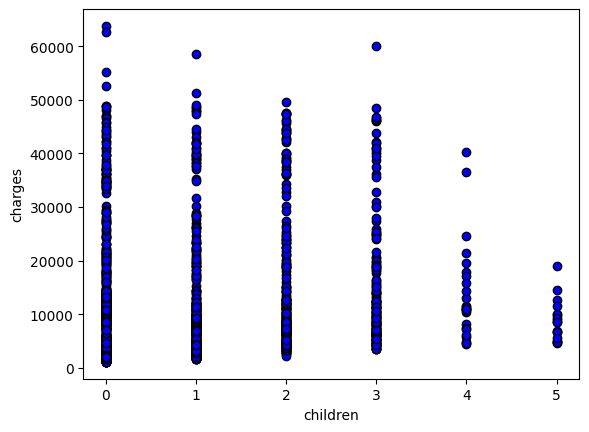

In [100]:
#Visualize the target variable with respect to the features

# To Visualize target and features for numerical vals we can use scatter plot
# because it is not continous like time series data.

numericals = ['age', 'bmi', 'children']
target = 'charges'
for col in numericals:
    plt.scatter(df[col], df[target], color='blue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

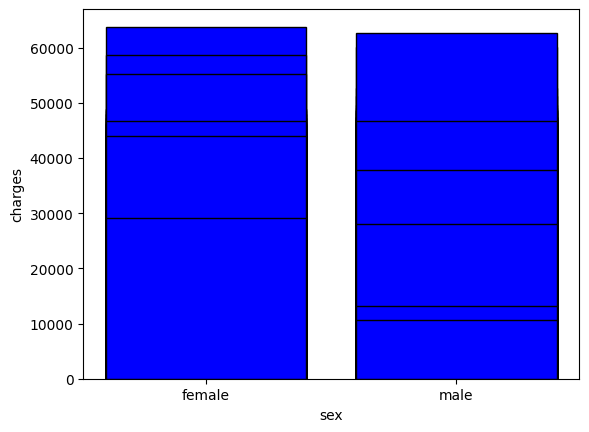

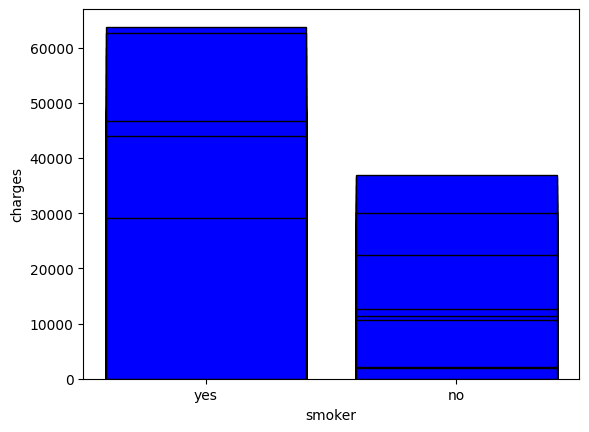

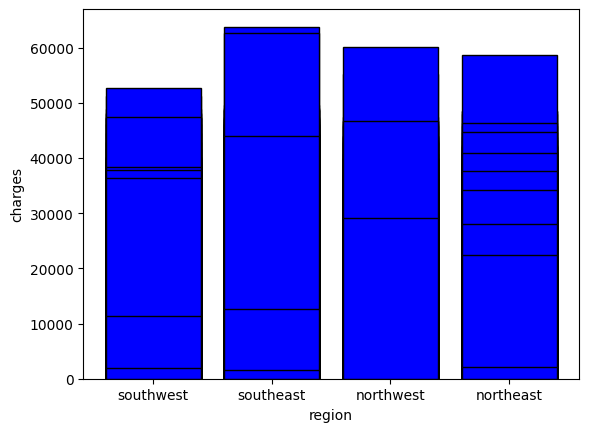

In [101]:
# To Visualize target and features for categorical vals we can use bar chart.
categoricals = ['sex', 'smoker', 'region']
target = 'charges'
for col in categoricals:
    plt.bar(df[col], df[target], color='blue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

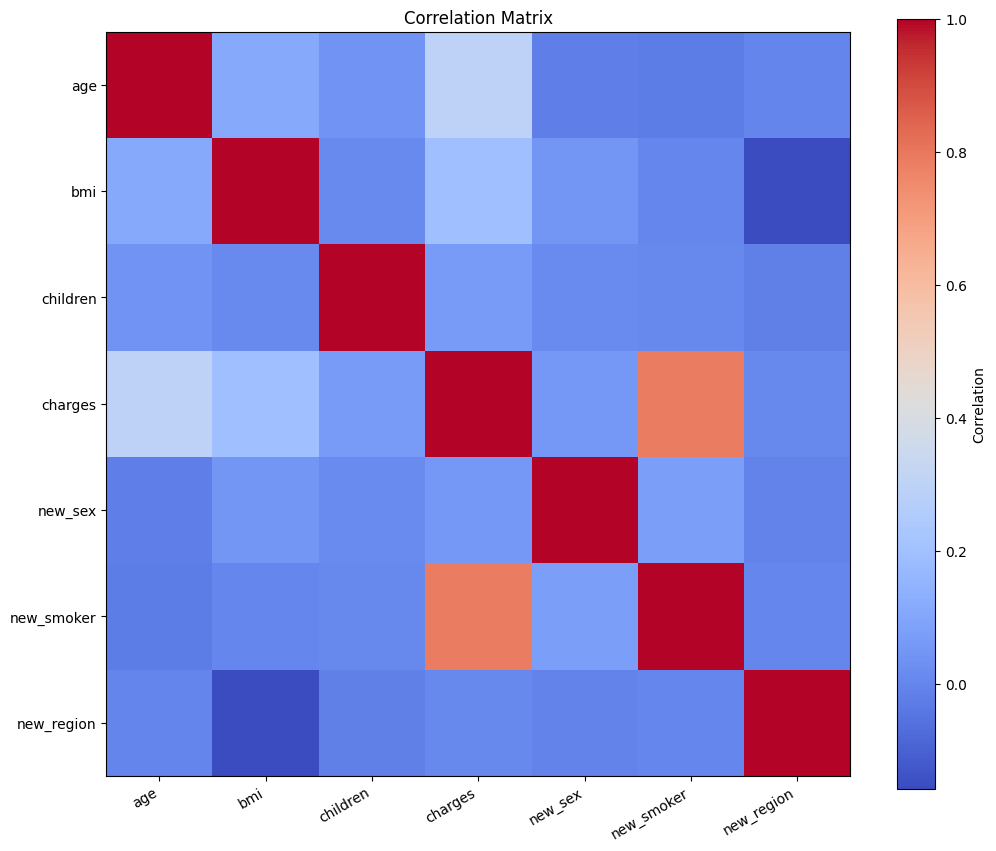

In [162]:
#Visualize the correlation between the features using a heatmap

# Create a copy of the original DataFrame
new_df = df.copy()

# Define the unique values for each categorical column
sex_list = ['female', 'male']
smoker_list = ['no', 'yes']
region_list = ['southwest', 'southeast', 'northwest', 'northeast']

# Encoding columns using list index
new_df['new_sex'] = [sex_list.index(value) for value in new_df['sex']]

new_df['new_smoker'] = [smoker_list.index(value) for value in new_df['smoker']]

new_df['new_region'] = [region_list.index(value) for value in new_df['region']]

# Select numerical and encoded categorical columns
selected_cols = ['age', 'bmi', 'children', 'charges', 'new_sex', 'new_smoker', 'new_region']
df_encoded = new_df[selected_cols]

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation")
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=30, ha='right')
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [104]:
"""I used the IQR method because it is simple, effective, and widely used for
detecting outliers in numerical data. It helps identify extreme values systematically by
using the interquartile range, and the boxplot visually highlights these outliers,
making it easy to interpret and analyze the data distribution."""

# Columns to detect outliers for numerical data.
outlier_cols = ['bmi', 'age', 'charges', 'children']

# Create a dictionary to store outliers for each column
memorized = {}

# Apply IQR method for each specified column
for col in outlier_cols:
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    IQR = quartile3 - quartile1  # Interquartile Range

    # Define the lower and upper bounds
    low_bound = quartile1 - (1.5 * IQR)
    high_bound = quartile3 + (1.5 * IQR)

    # Identify outliers for the current column
    condition = (df[col] < low_bound) | (df[col] > high_bound)
    outliers = df[condition]
    #store values
    memorized[col] = outliers


In [105]:
# outlier for bmi

memorized['bmi']

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [106]:
# outlier for children
memorized['children']

# So we can say that there is no outliers for children

,age,sex,bmi,children,smoker,region,charges


In [107]:
# outlier for age
memorized['age']

# So we can say that there is no outliers for children

,age,sex,bmi,children,smoker,region,charges


In [108]:
# outlier for charges
memorized['charges']

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

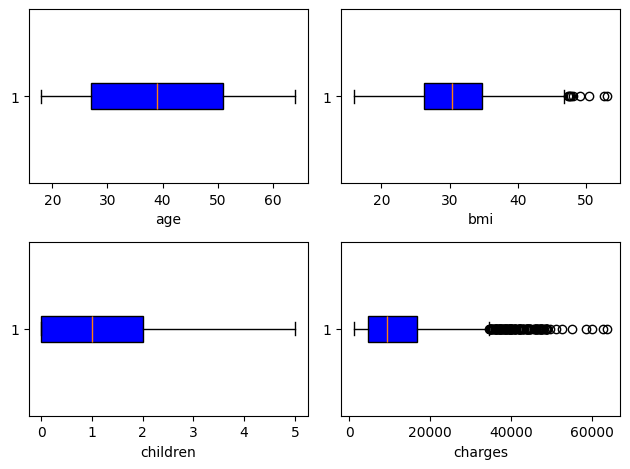

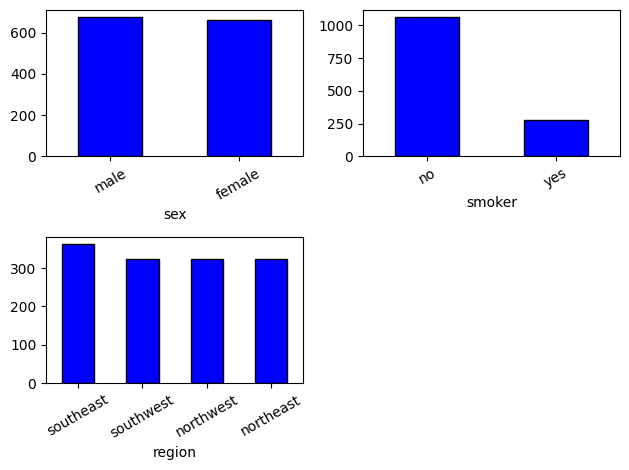

In [114]:
# Original dataset can be visualized with the boxplot method for numeric values
# categorical values can be visualized with the bar chart.

categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Original DataFrame checkpoint.
original_df = df.copy()

# Boxplot for numerical values
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'))
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# BarChart for Categorical values
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind='bar', color='blue', edgecolor='black')
    #Rotate
    plt.xticks(rotation=30)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


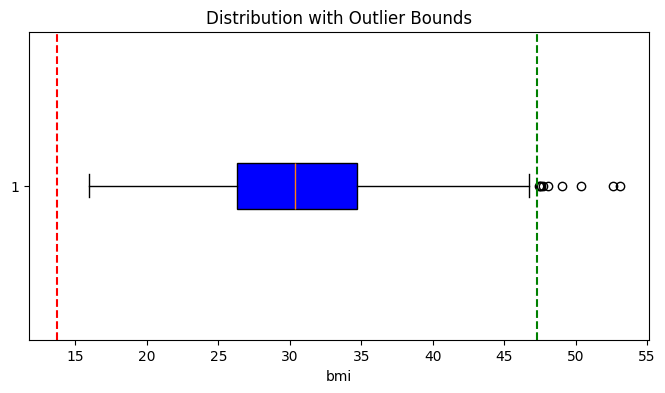

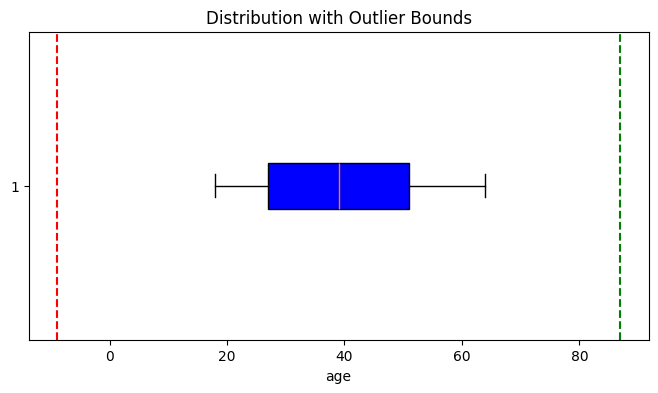

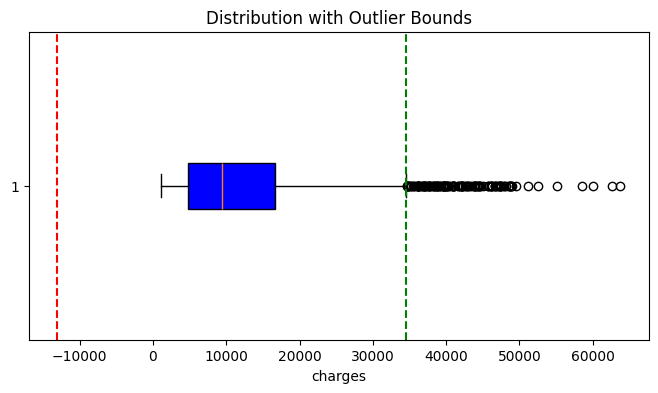

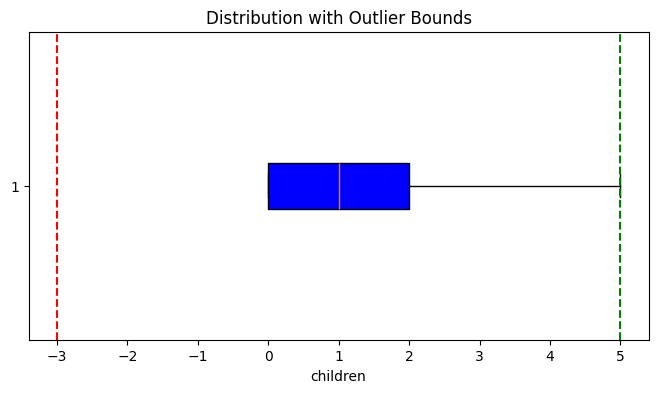

In [ ]:
# for outlayer removal we know that lower and upper bound from 1.2

outlier_cols = ['bmi', 'age', 'charges', 'children']

# copy of the original DataFrame
df_outlayer_removed = df.copy()

# Initialize a condition for keeping all rows
overall_condition = pd.Series(True, index=df.index)

# Loop through each column and apply the IQR method
for col in outlier_cols:
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    IQR = quartile3 - quartile1

    low_bound = quartile1 - (1.5 * IQR)
    high_bound = quartile3 + (1.5 * IQR)

    # Update the overall condition to include valid rows for this column
    overall_condition &= (df[col] >= low_bound) & (df[col] <= high_bound)

    # Plot the boxplot for the current column after calculating bounds
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'))
    plt.axvline(low_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(high_bound, color='green', linestyle='--', label='Upper Bound')
    plt.xlabel(col)
    plt.title("Distribution with Outlier Bounds")
    plt.show()

# Apply the final condition to filter the DataFrame
df_outlayer_removed = df[overall_condition]

<ipython-input-116-67fae0e3b797>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39.20702541106129' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mean_imputed_df.loc[~condition, column] = mean_value


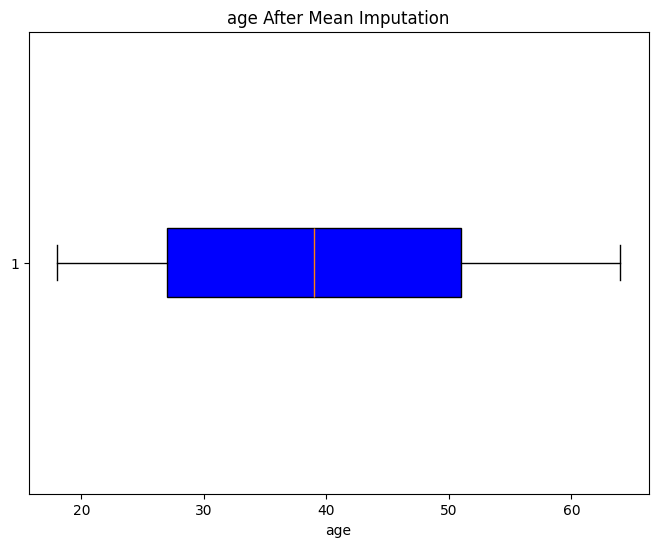

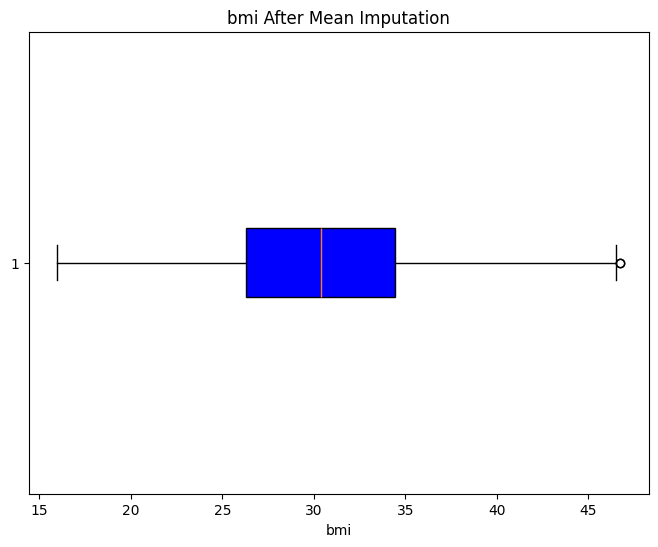

<ipython-input-116-67fae0e3b797>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0949177877429' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mean_imputed_df.loc[~condition, column] = mean_value


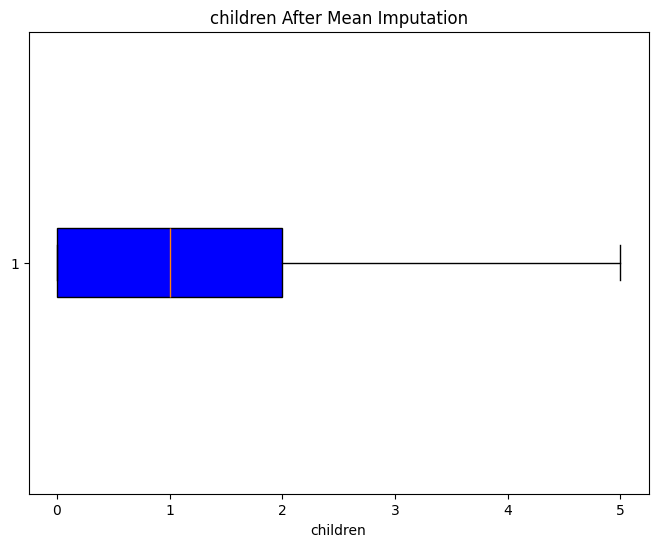

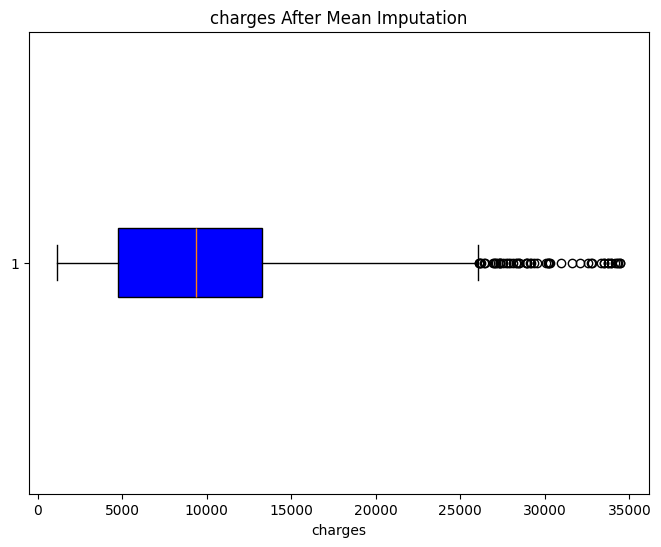

In [116]:
# Mean Imputation for numeric columns
mean_imputed_df = df.copy()

numeric_cols = ['age', 'bmi', 'children', 'charges']

for column in numeric_cols:
    # Calculate IQR
    Q1 = mean_imputed_df[column].quantile(0.25)
    Q3 = mean_imputed_df[column].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - (1.5 * IQR)
    high_bound = Q3 + (1.5 * IQR)

    # Calculate mean value
    mean_value = mean_imputed_df[column].mean()

    # Replace outliers with mean
    condition = (mean_imputed_df[column] >= low_bound) & (mean_imputed_df[column] <= high_bound)
    mean_imputed_df.loc[~condition, column] = mean_value

    # Optional: Visualization after imputation
    plt.figure(figsize=(8, 6))
    plt.boxplot(mean_imputed_df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
    plt.title(f"{column} After Mean Imputation")
    plt.xlabel(column)
    plt.show()



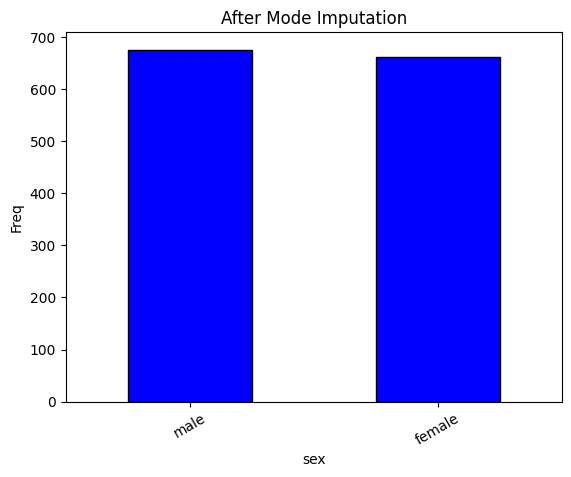

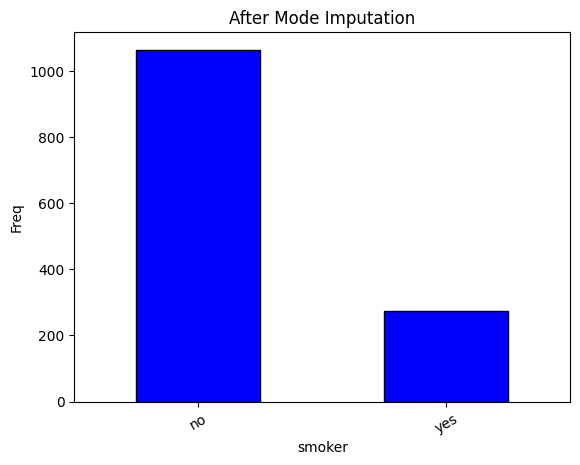

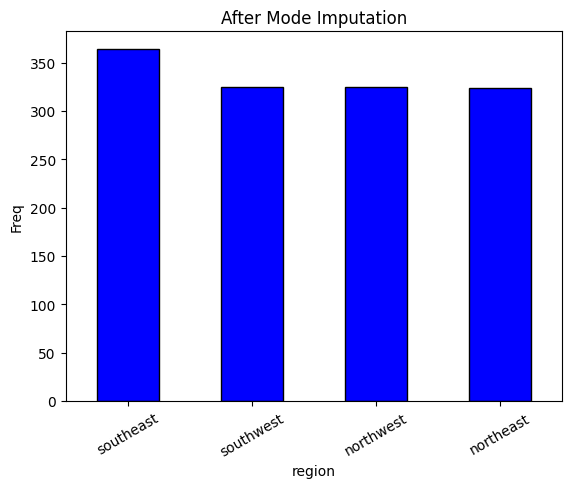

In [119]:
#Mean Imputation
#for categorical cols we can use bar charts

categorical_cols = ['sex', 'smoker', 'region']

for column in categorical_cols:
    mode_value = mean_imputed_df[column].mode()[0]
    mean_imputed_df[column] = mean_imputed_df[column].fillna(mode_value)

    mean_imputed_df[column].value_counts().plot(kind='bar', color='blue', edgecolor='black')

    plt.title("After Mode Imputation")
    plt.xlabel(column)
    plt.ylabel("Freq")
    plt.xticks(rotation=30)
    plt.show()


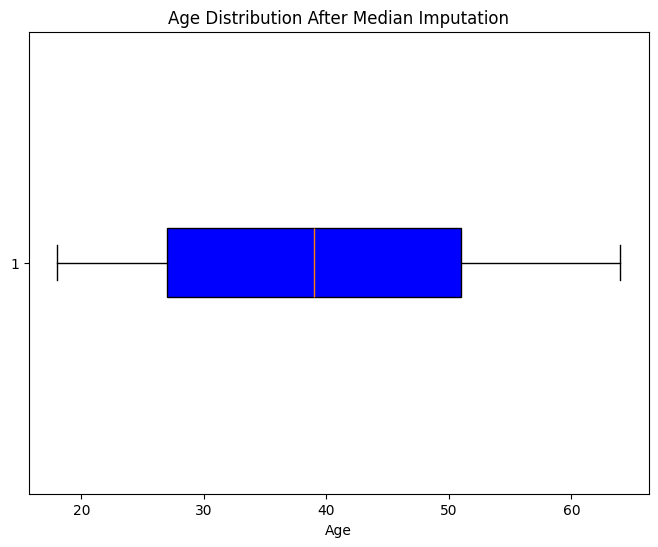

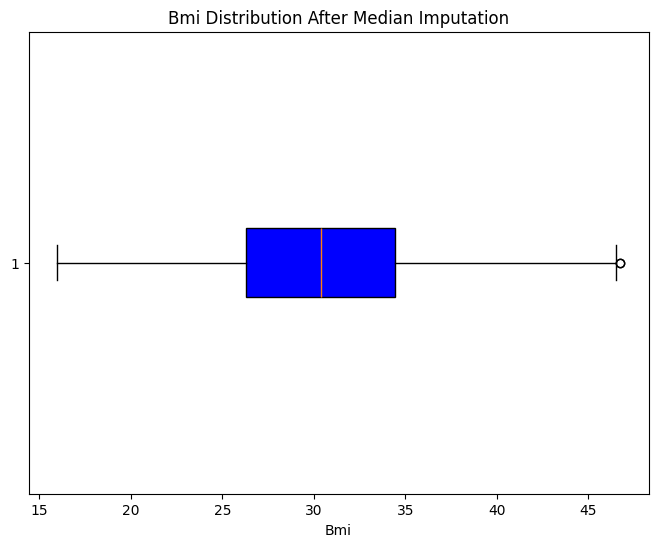

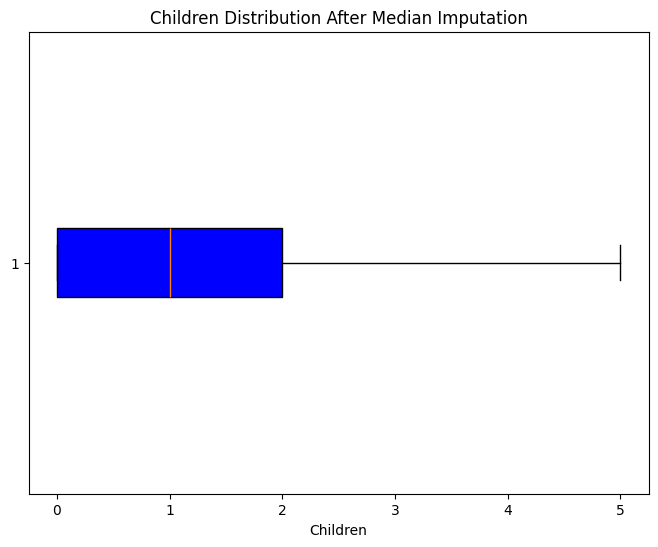

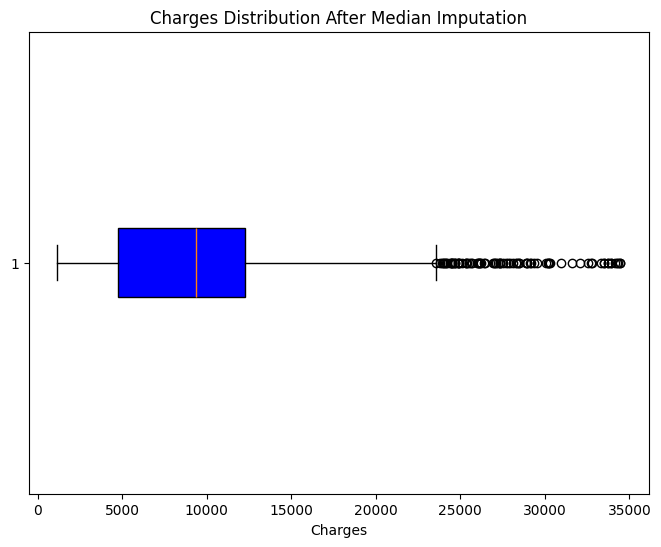

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [164]:
# Median Imputation for numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Create a copy of the original DataFrame
median_imputed_df = df.copy()

for column in numerical_columns:
    # Calculate IQR and bounds
    Quartile1 = median_imputed_df[column].quantile(0.25)
    Quartile3 = median_imputed_df[column].quantile(0.75)
    IQR = Quartile3 - Quartile1
    low_bound = Quartile1 - (1.5 * IQR)
    high_bound = Quartile3 + (1.5 * IQR)

    # Calculate median value
    median_val = median_imputed_df[column].median()

    # Replace outliers with median (No clip here to avoid overriding)
    imputate_condition = (median_imputed_df[column] >= low_bound) & (median_imputed_df[column] <= high_bound)
    median_imputed_df.loc[~imputate_condition, column] = median_val

    # Visualization after each step
    plt.figure(figsize=(8, 6))
    plt.boxplot(median_imputed_df[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'))
    plt.title(f"{column.capitalize()} Distribution After Median Imputation")
    plt.xlabel(column.capitalize())
    plt.show()

# Display the resulting DataFrame
print(median_imputed_df.head())


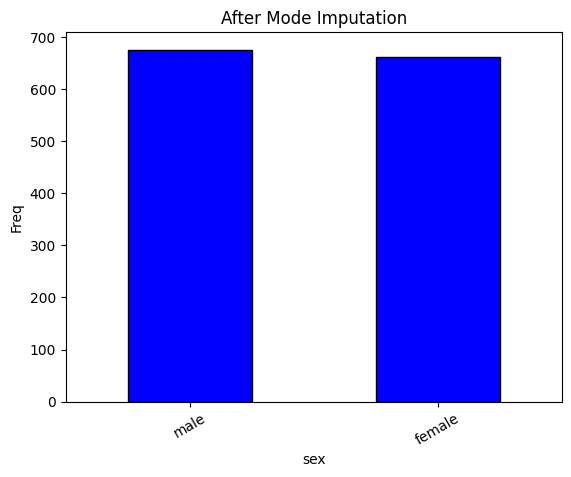

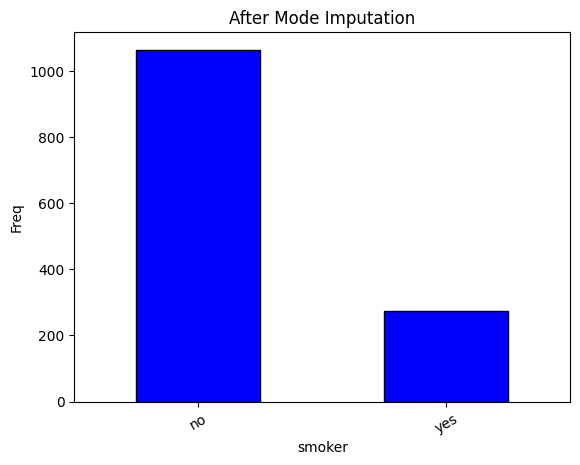

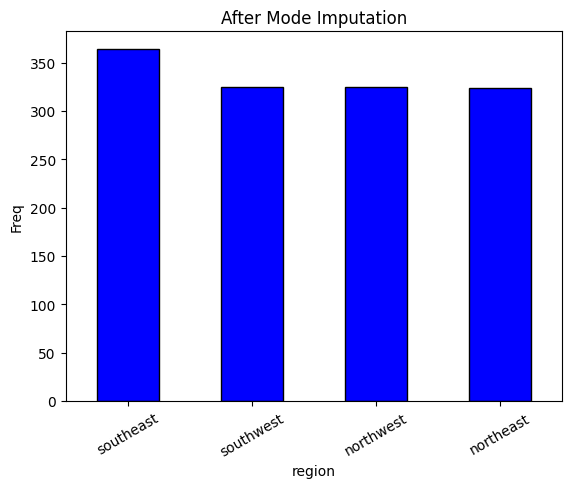

In [165]:
#Mean Imputation
#for categorical cols we can use bar charts

categorical_cols = ['sex', 'smoker', 'region']

for column in categorical_cols:
    median_val = median_imputed_df[column].mode()[0]
    median_imputed_df[column] = median_imputed_df[column].fillna(median_val)
    median_imputed_df[column].value_counts().plot(kind='bar', color='blue', edgecolor='black')

    plt.title("After Mode Imputation")
    plt.xlabel(column)
    plt.ylabel("Freq")
    plt.xticks(rotation=30)
    plt.show()

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [ ]:
def encode_categorical(df):
    # Define the unique values for each categorical column
    sex_list = ['female', 'male']
    smoker_list = ['no', 'yes']
    region_list = ['southwest', 'southeast', 'northwest', 'northeast']

    # Create a new DataFrame to avoid overwriting
    df_encoded = df.copy()

    # Encode columns with list indexing
    df_encoded['sex'] = [sex_list.index(value) if value in sex_list else -1 for value in df['sex']]
    df_encoded['smoker'] = [smoker_list.index(value) if value in smoker_list else -1 for value in df['smoker']]
    df_encoded['region'] = [region_list.index(value) if value in region_list else -1 for value in df['region']]

    # Return the encoded DataFrame
    return df_encoded

# Apply encoding to all datasets
original_df = encode_categorical(original_df)
df_outlayer_removed = encode_categorical(df_outlayer_removed)
mean_imputed_df = encode_categorical(mean_imputed_df)
median_imputed_df = encode_categorical(median_imputed_df)


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [ ]:
import random


def shuffle_and_split(df, train_rate=0.7):

    # Shuffle the data
    random.seed(64)
    new_indices = random.sample(list(df.index), len(df.index))
    shuffled_df = df.loc[new_indices].reset_index(drop=True)

    # Split into train and test sets
    train_size = int(train_rate * len(shuffled_df))
    train_df = shuffled_df.iloc[:train_size]
    test_df = shuffled_df.iloc[train_size:]

    return train_df, test_df


# Shuffled split for not encoded original df.
train_df, test_df = shuffle_and_split(df)

In [127]:
# Train data
train_df

,age,sex,bmi,children,smoker,region,charges
0,29,male,22.895,0,yes,northeast,16138.76205
1,55,female,25.365,3,no,northeast,13047.33235
2,38,female,19.950,2,no,northeast,7133.90250
3,42,female,37.900,0,no,southwest,6474.01300
4,36,male,28.025,1,yes,northeast,20773.62775
...,...,...,...,...,...,...,...
931,46,female,30.800,3,no,southwest,9414.92000
932,60,male,39.900,0,yes,southwest,48173.36100
933,57,female,30.495,0,no,northwest,11840.77505
934,61,female,28.200,0,no,southwest,13041.92100


In [128]:
# Test adata
test_df

,age,sex,bmi,children,smoker,region,charges
936,58,male,34.390,0,no,northwest,11743.93410
937,29,male,32.110,2,no,northwest,4433.91590
938,57,female,28.785,4,no,northeast,14394.39815
939,46,female,35.530,0,yes,northeast,42111.66470
940,46,male,30.495,3,yes,northwest,40720.55105
...,...,...,...,...,...,...,...
1333,57,male,27.940,1,no,southeast,11554.22360
1334,28,male,35.435,0,no,northeast,3268.84665
1335,18,male,30.400,3,no,northeast,3481.86800
1336,39,female,24.225,5,no,northwest,8965.79575


# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


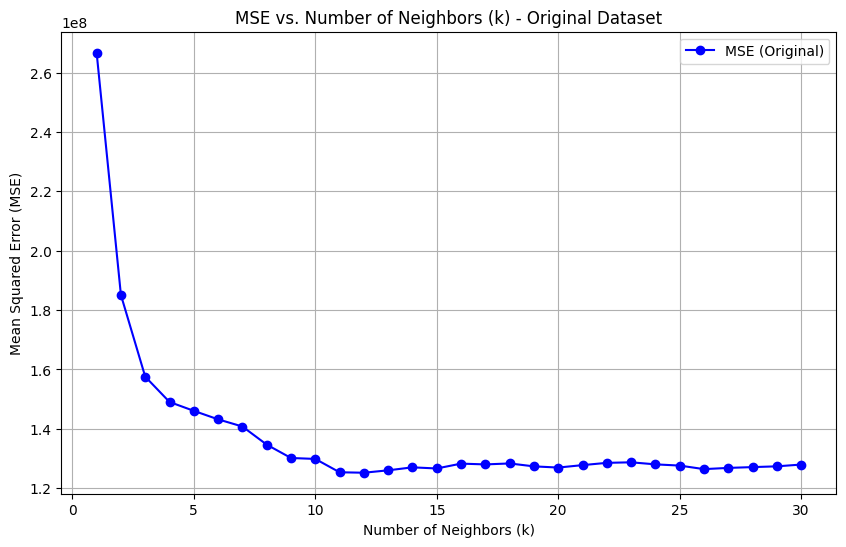

In [ ]:
# Shuffle and split the original dataset
train_rate = 0.7
train_data_original, test_data_original = shuffle_and_split(original_df, train_rate)

# Initialize lists for MSE values (specific to original dataset)
mse_val_eachk_original = []
all_kvalues_original = range(1, 31)
mse_knn_memorization = {}

# Define X (features) and y (target) for the original dataset
y_train_original = train_data_original['charges']
y_test_original = test_data_original['charges']
X_train_original = train_data_original.drop(columns='charges')
X_test_original = test_data_original.drop(columns='charges')

# Train KNN model for k = 1 to 30 on original dataset
for k in all_kvalues_original:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_original, y_train_original)
    y_predict_original = knn.predict(X_test_original)
    mse_val_eachk_original.append(mean_squared_error(y_test_original, y_predict_original))

# Plot MSE vs k for the original dataset
plt.figure(figsize=(10, 6))
plt.plot(all_kvalues_original, mse_val_eachk_original, marker='o', label='MSE (Original)', color='blue')
plt.title('MSE vs. Number of Neighbors (k) - Original Dataset')
plt.xlabel('Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


In [151]:
# From plot we can pick the k as 11 or 12.

optimal_k_original = 11

# Train KNN model with optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k_original)
knn.fit(X_train_original, y_train_original)
y_predict_optimal = knn.predict(X_test_original)

# R² for the optimal k
r2_optimal = r2_score(y_test_original, y_predict_optimal)

print(f"R² score for optimal k (Original): {r2_optimal:.4f}")

# Mse Value for Optimal K
mse_optimal = mean_squared_error(y_test_original, y_predict_optimal)
print(f"MSE for optimal k (Original): {mse_optimal / 1e8:.4f} x 10^8")

# Memorize mse for result part.
mse_knn_memorization["Original"] = mse_optimal

R² score for optimal k (Original): -0.0097
MSE for optimal k (Original): 1.2533 x 10^8


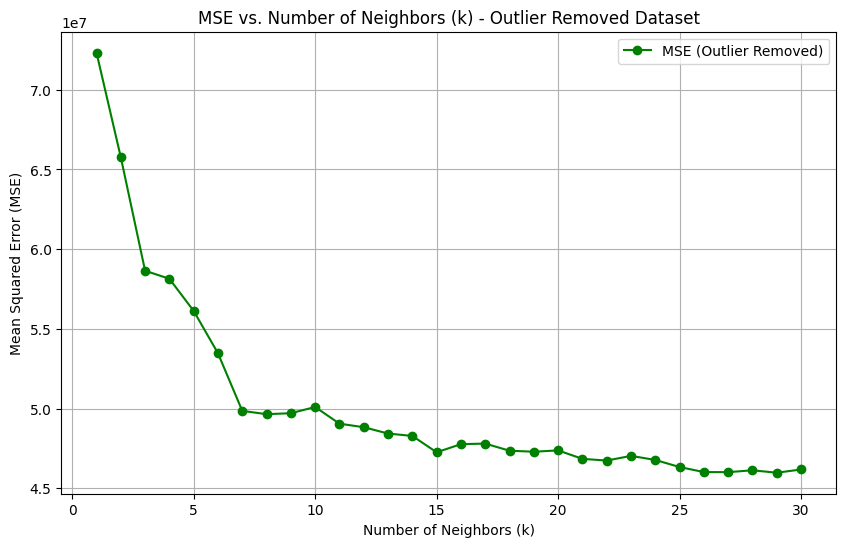

In [ ]:
# Shuffle and split the outlier removed dataset
train_rate = 0.7
train_data_outlier_removed, test_data_outlier_removed = shuffle_and_split(df_outlayer_removed, train_rate)

# Initialize lists for MSE and R² values
mse_val_eachk_outlier_removed = []
all_kvalues_outlier_removed = range(1, 31)

# Define X (features) and y (target) for the outlier removed dataset
y_train_outlier_removed = train_data_outlier_removed['charges']
y_test_outlier_removed = test_data_outlier_removed['charges']
X_train_outlier_removed = train_data_outlier_removed.drop(columns='charges')
X_test_outlier_removed = test_data_outlier_removed.drop(columns='charges')

# Train KNN model for k = 1 to 30 on outlier removed dataset
for k in all_kvalues_outlier_removed:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_outlier_removed, y_train_outlier_removed)
    y_predict_outlier_removed = knn.predict(X_test_outlier_removed)
    mse_val_eachk_outlier_removed.append(mean_squared_error(y_test_outlier_removed, y_predict_outlier_removed))

# Plot MSE vs k for the outlier removed dataset
plt.figure(figsize=(10, 6))
plt.plot(all_kvalues_outlier_removed, mse_val_eachk_outlier_removed, marker='o', label='MSE (Outlier Removed)', color='green')
plt.title('MSE vs. Neighbors (k) - Outlier Removed Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# From plot we can pick the k as 27

# to reach R squared val we need to find k value index
optimal_k_outlier_removed = 27

# Train KNN model with optimal k
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k_outlier_removed)
knn_optimal.fit(X_train_outlier_removed, y_train_outlier_removed)

# Predict the test set
y_predict_optimal_outlier_removed = knn_optimal.predict(X_test_outlier_removed)

# Calculate R² score for the optimal k
r2_optimal_outlier_removed = r2_score(y_test_outlier_removed, y_predict_optimal_outlier_removed)
print(f"R² score for optimal k ({optimal_k_outlier_removed}): {r2_optimal_outlier_removed:.4f}")

# Mse value for optimal k
mse_optimal_outlier_removed = mean_squared_error(y_test_outlier_removed, y_predict_optimal_outlier_removed)
print(f"MSE for optimal k ({optimal_k_outlier_removed}): {mse_optimal_outlier_removed / 1e8:.4f} x 10^8")

# Memorize mse for result part.
mse_knn_memorization["Outlier Removed"] = mse_optimal_outlier_removed

R² score for optimal k (27): 0.1556
MSE for optimal k (27): 0.4601 x 10^8


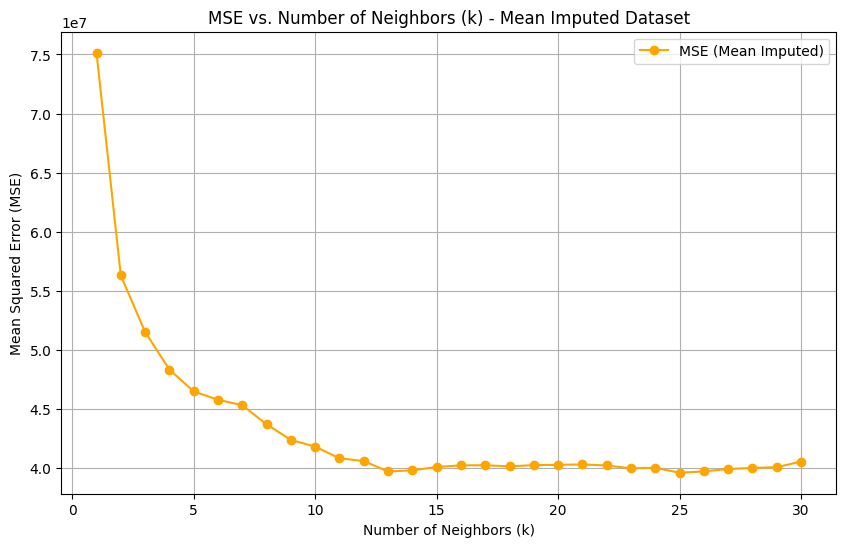

In [ ]:
# For Mean Imputed df.

# Shuffle and split the mean imputed dataset
train_rate = 0.7
train_data_mean_imputed, test_data_mean_imputed = shuffle_and_split(mean_imputed_df, train_rate)


# Initialize lists for MSE and R² values
mse_val_eachk_mean_imputed = []
all_kvalues_mean_imputed = range(1, 31)

# Define X (features) and y (target) for the mean imputed dataset
y_train_mean_imputed = train_data_mean_imputed['charges']
y_test_mean_imputed = test_data_mean_imputed['charges']
X_train_mean_imputed = train_data_mean_imputed.drop(columns='charges')
X_test_mean_imputed = test_data_mean_imputed.drop(columns='charges')

# Train KNN model for k = 1 to 30 on mean imputed dataset
for k in all_kvalues_mean_imputed:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_mean_imputed, y_train_mean_imputed)
    y_predict_mean_imputed = knn.predict(X_test_mean_imputed)
    mse_val_eachk_mean_imputed.append(mean_squared_error(y_test_mean_imputed, y_predict_mean_imputed))

# Plot MSE vs k for the mean imputed dataset
plt.figure(figsize=(10, 6))
plt.plot(all_kvalues_mean_imputed, mse_val_eachk_mean_imputed, marker='o', label='MSE (Mean Imputed)', color='orange')
plt.title('MSE vs. Neighbors (k) - Mean Imputed Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

In [149]:
# From plot we can pick the k as 13 or 14

optimal_k_mean_imputed = 13

# Train KNN model with optimal k
knn_optimal_mean_imputed = KNeighborsRegressor(n_neighbors=optimal_k_mean_imputed)
knn_optimal_mean_imputed.fit(X_train_mean_imputed, y_train_mean_imputed)

# Predict the test set
y_predict_optimal_mean_imputed = knn_optimal_mean_imputed.predict(X_test_mean_imputed)

# Calculate R² score for the optimal k
r2_optimal_mean_imputed = r2_score(y_test_mean_imputed, y_predict_optimal_mean_imputed)
print(f"R² score for optimal k ({optimal_k_mean_imputed}): {r2_optimal_mean_imputed:.4f}")

# Mse value for optimal k
mse_optimal_mean_imputed = mean_squared_error(y_test_mean_imputed, y_predict_optimal_mean_imputed)
print(f"MSE for optimal k ({optimal_k_mean_imputed}): {mse_optimal_mean_imputed / 1e8:.4f} x 10^8")

# Memorize mse for result part.
mse_knn_memorization["Mean Imputed"] = mse_optimal_mean_imputed

R² score for optimal k (13): 0.1591
MSE for optimal k (13): 0.3969 x 10^8


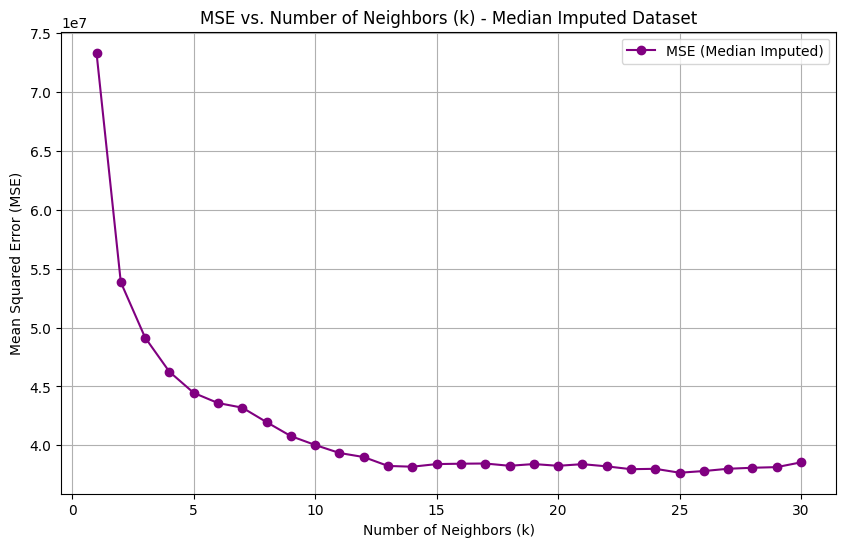

In [ ]:
# For Median Imputed df.

# Shuffle and split the median imputed dataset
train_rate = 0.7
train_data_median_imputed, test_data_median_imputed = shuffle_and_split(median_imputed_df, train_rate)

# Initialize lists for MSE and R² values
mse_val_eachk_median_imputed = []
all_kvalues_median_imputed = range(1, 31)

# Define X (features) and y (target) for the median imputed dataset
y_train_median_imputed = train_data_median_imputed['charges']
y_test_median_imputed = test_data_median_imputed['charges']
X_train_median_imputed = train_data_median_imputed.drop(columns='charges')
X_test_median_imputed = test_data_median_imputed.drop(columns='charges')

# Train KNN model for k = 1 to 30 on median imputed dataset
for k in all_kvalues_median_imputed:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_median_imputed, y_train_median_imputed)
    y_predict_median_imputed = knn.predict(X_test_median_imputed)
    mse_val_eachk_median_imputed.append(mean_squared_error(y_test_median_imputed, y_predict_median_imputed))

# Plot MSE vs k for the median imputed dataset
plt.figure(figsize=(10, 6))
plt.plot(all_kvalues_median_imputed, mse_val_eachk_median_imputed, marker='o', label='MSE (Median Imputed)', color='purple')
plt.title('MSE vs. Number of Neighbors (k) - Median Imputed Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

In [150]:
# From plot we can pick the k as 25.

optimal_k_median_imputed = 25

# Train KNN model with optimal k
knn_optimal_median_imputed = KNeighborsRegressor(n_neighbors=optimal_k_median_imputed)
knn_optimal_median_imputed.fit(X_train_median_imputed, y_train_median_imputed)

# Predict the test set
y_predict_optimal_median_imputed = knn_optimal_median_imputed.predict(X_test_median_imputed)

# Calculate R² score for the optimal k
r2_optimal_median_imputed = r2_score(y_test_median_imputed, y_predict_optimal_median_imputed)
print(f"R² score for optimal k ({optimal_k_median_imputed}): {r2_optimal_median_imputed:.4f}")

# write it 10**8
mse = mean_squared_error(y_test_median_imputed, y_predict_optimal_median_imputed)
print(f"MSE for optimal k ({optimal_k_median_imputed}): {mse / 1e8:.4f} x 10^8")

# Memorize mse for result part.
mse_knn_memorization["Median Imputed"] = mse

R² score for optimal k (25): 0.1830
MSE for optimal k (25): 0.3768 x 10^8


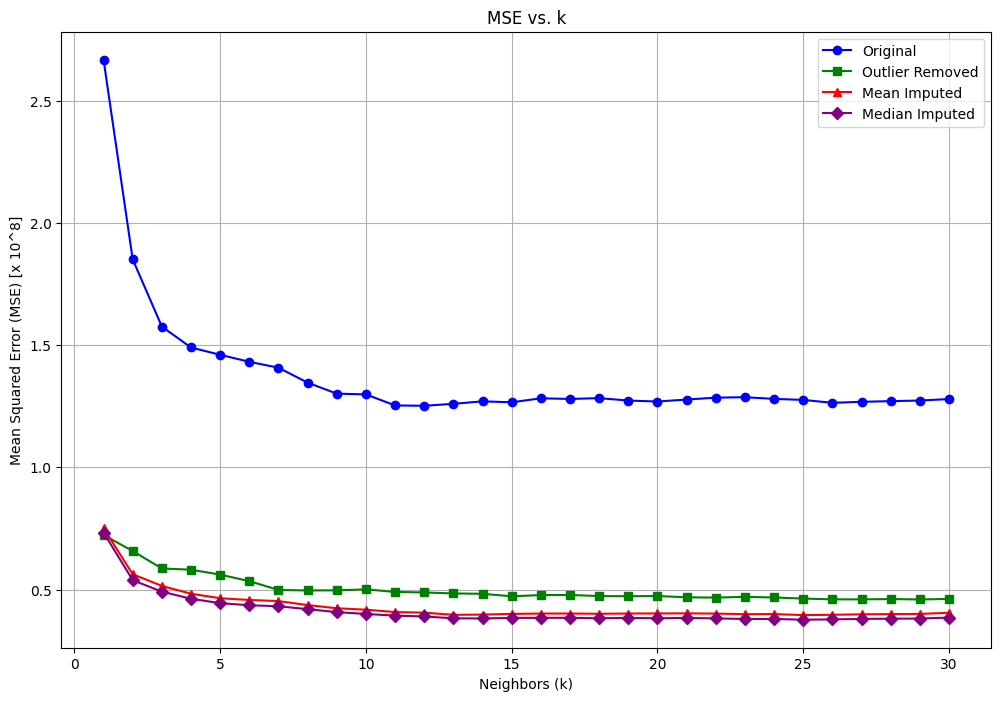

In [ ]:
# We can gather all MSE's to the one graph.

# Plot MSE vs k for all datasets in one graph
plt.figure(figsize=(12, 8))

# All Datasets
plt.plot(all_kvalues_original, [mse / 1e8 for mse in mse_val_eachk_original], marker='o', label='Original', color='blue')

plt.plot(all_kvalues_outlier_removed, [mse / 1e8 for mse in mse_val_eachk_outlier_removed], marker='s', label='Outlier Removed', color='green')

plt.plot(all_kvalues_mean_imputed, [mse / 1e8 for mse in mse_val_eachk_mean_imputed], marker='^', label='Mean Imputed', color='red')

plt.plot(all_kvalues_median_imputed, [mse / 1e8 for mse in mse_val_eachk_median_imputed], marker='D', label='Median Imputed', color='purple')

# Add graph details
plt.title('MSE vs. k')
plt.xlabel('Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE) [x 10^8]')
plt.grid(True)
plt.legend()
plt.show()


## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

In [ ]:
# Each version of datasets we splited before
datasets = {
    "Original": (X_train_original, X_test_original, y_train_original, y_test_original),
    "Outlier Removed": (X_train_outlier_removed, X_test_outlier_removed, y_train_outlier_removed, y_test_outlier_removed),
    "Mean Imputed": (X_train_mean_imputed, X_test_mean_imputed, y_train_mean_imputed, y_test_mean_imputed),
    "Median Imputed": (X_train_median_imputed, X_test_median_imputed, y_train_median_imputed, y_test_median_imputed)
}

# Dict for holding values.
mse_linear_regression_memorization = {}

# Linear Regression for all dataset.
for name, (X_train, X_test, y_train, y_test) in datasets.items():
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    y_predict = linear_model.predict(X_test)

    # Calculating MSE
    mse = mean_squared_error(y_test, y_predict)


    mse_linear_regression_memorization[name] = mse

# Printing output
for name, mse in mse_linear_regression_memorization.items():
    print(f"MSE for {name}: {mse / 1e8:.4f} x 10^8")
    mse_linear_regression_memorization[name] = mse

MSE for Original: 1.1622 x 10^8
MSE for Outlier Removed: 0.4756 x 10^8
MSE for Mean Imputed: 0.3984 x 10^8
MSE for Median Imputed: 0.3819 x 10^8


## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

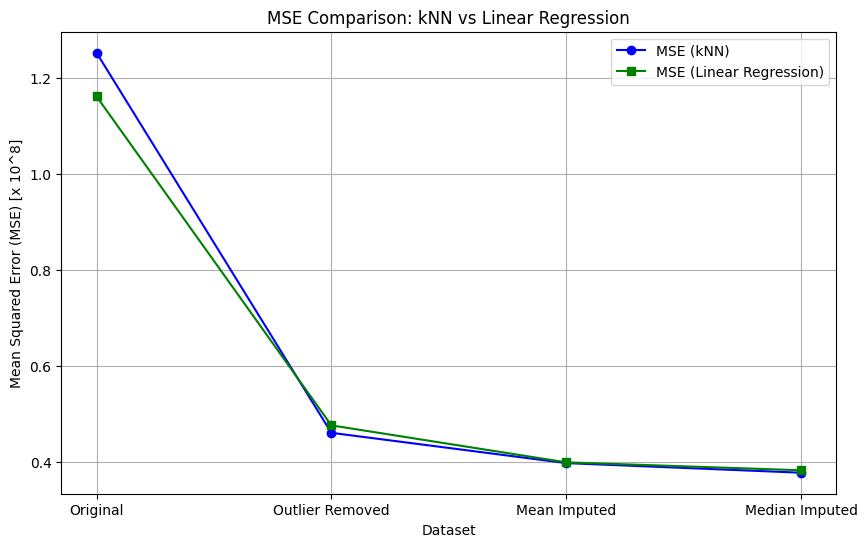

In [158]:
# Comparing Mse results for getting mse values from different dicts.
results = {
    "Dataset": ["Original", "Outlier Removed", "Mean Imputed", "Median Imputed"],
    "MSE (kNN)": [
        mse_knn_memorization["Original"] / 1e8,
        mse_knn_memorization["Outlier Removed"] / 1e8,
        mse_knn_memorization["Mean Imputed"] / 1e8,
        mse_knn_memorization["Median Imputed"] / 1e8,
    ],
    "MSE (Linear Regression)": [
        mse_linear_regression_memorization["Original"] / 1e8,
        mse_linear_regression_memorization["Outlier Removed"] / 1e8,
        mse_linear_regression_memorization["Mean Imputed"] / 1e8,
        mse_linear_regression_memorization["Median Imputed"] / 1e8,
    ]
}

# Creating Table
df_results = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.plot(df_results["Dataset"], df_results["MSE (kNN)"], marker='o', label="MSE (kNN)", color="blue")

# Linear Regression MSE
plt.plot(df_results["Dataset"], df_results["MSE (Linear Regression)"], marker='s', label="MSE (Linear Regression)", color="green")

# Graphic Details
plt.title("MSE Comparison: kNN vs Linear Regression")
plt.xlabel("Dataset")
plt.ylabel("Mean Squared Error (MSE) [x 10^8]")
plt.legend()
plt.grid(True)
plt.show()


In [160]:
# Printing the solid table
df_results

,Dataset,MSE (kNN),MSE (Linear Regression)
0,Original,1.253344,1.162215
1,Outlier Removed,0.460091,0.475630
2,Mean Imputed,0.396868,0.398447
3,Median Imputed,0.376793,0.381897


In [ ]:
# Discussing the strengths and limitations
"""
kNN regression is effective for non-linear relationships and localized patterns, performing well after preprocessing steps like outlier removal.
However, it is sensitive to outliers, computationally expensive for large datasets, and requires careful tuning of the k parameter.

Linear Regression is simpler, computationally efficient, and performs well on structured datasets with linear relationships.
However, its performance on datasets without outliers, like the Outlier Removed Dataset, is slightly worse due to its sensitivity to extreme values.
Interestingly, Linear Regression produced nearly identical results on the Mean and Median Imputed datasets, emphasis its consistency on well-balanced data.

In conclusion, kNN is preferable for non-linear data with localized patterns, while Linear Regression is better for structured,
linear datasets with minimal outliers. Both models show their strengths depending on the nature and preprocessing of the data."""


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.